# Lesson 1 - MNIST


## Mounting Google drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:

%cd /gdrive/My\ Drive/Colab\ Notebooks/Kaggle/MNIST
!ls


/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST
digit-recognizer.zip  sample_submission.csv  test.csv
MNIST.ipynb	      small_smiley.png	     train.csv


In [0]:
import os
from os import walk


## Looking at the data

In [0]:
#!unzip digit-recognizer.zip
#!ls

Archive:  digit-recognizer.zip
  inflating: train.csv               
  inflating: test.csv                
  inflating: sample_submission.csv   
digit-recognizer.zip  MNIST.ipynb  sample_submission.csv  test.csv  train.csv


In [0]:
print(os.getcwd())



/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST
digit-recognizer.zip  MNIST.ipynb  sample_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [0]:
train.shape,test.shape

((42000, 785), (28000, 784))

### Processing training data

In [0]:
# To get the values of the pandas.
# The drop function identifies the label ' Label' and deletes either the row ( axis 0) or the column ( axis =1)
X = train.drop(['label'],axis=1).values


In [0]:
# Variable X has the values of the pixels ( We have deleted the labels)
X.shape
print ('The max value of the X variable is:',np.amax(X))
print ('The minimim value of the X variable is:',np.amin(X))

The max value of the X variable is: 255
The minimim value of the X variable is: 0


In [0]:
# But we need the labels in order to train the model.
y = train['label'].values 
print(' These are the first labels of the set-->',y[:5])

 These are the first labels of the set--> [1 0 1 4 0]


### Processing test data

In [0]:
# Very similar to what we did to the train data. 
# We need just the values of the pixels.

test_x=test.values

print ('The max value of the test_x variable is:',np.amax(test_x))
print ('The minimim value of the test_x variable is:',np.amin(test_x))


The max value of the test_x variable is: 255
The minimim value of the test_x variable is: 0


### Machine learning feature engineering

In [0]:
# ML algorithims perform better is they use data with range [0..1]
X = X / np.amax(X)
test_x = test_x / np.amax(test_x)

In [0]:
# In addtion, ML algorithim works better with squared data.
print('The current shape of the training data is:',X.shape)
print('The current shape of the testing data is:',test_x.shape)

#After reshaping

X = X.reshape(X.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

print('The new shape of the training data is:',X.shape)
print('The new shape of the testing data is:',test_x.shape)

The current shape of the training data is: (42000, 784)
The current shape of the testing data is: (28000, 784)
The new shape of the training data is: (42000, 28, 28, 1)
The new shape of the testing data is: (28000, 28, 28, 1)


## Preparing the model

### Creating the interal testing data

In [0]:
from sklearn.model_selection import train_test_split
# This function splits the data into train a test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)


In [0]:
# We have a train data, right ? Train data with labels. So we split this data into
# interal train and internal test. 
# It is just to confimr that the model works.

print('The new shape of the training data is:',X.shape)
print('The new X_train of the training data is:',X_train.shape)
print('The new X_test of the training data is:',X_test.shape)
print('\n')
print('This is the number os labels',len(y))
print('The new y_train of the training data is:',y_train.shape)
print('The new y_test of the training data is:',y_test.shape)

The new shape of the training data is: (42000, 28, 28, 1)
The new X_train of the training data is: (39900, 28, 28, 1)
The new X_test of the training data is: (2100, 28, 28, 1)


This is the number os labels 42000
The new y_train of the training data is: (39900,)
The new y_test of the training data is: (2100,)


### Data display

In [0]:
X_train.shape[0]

39900

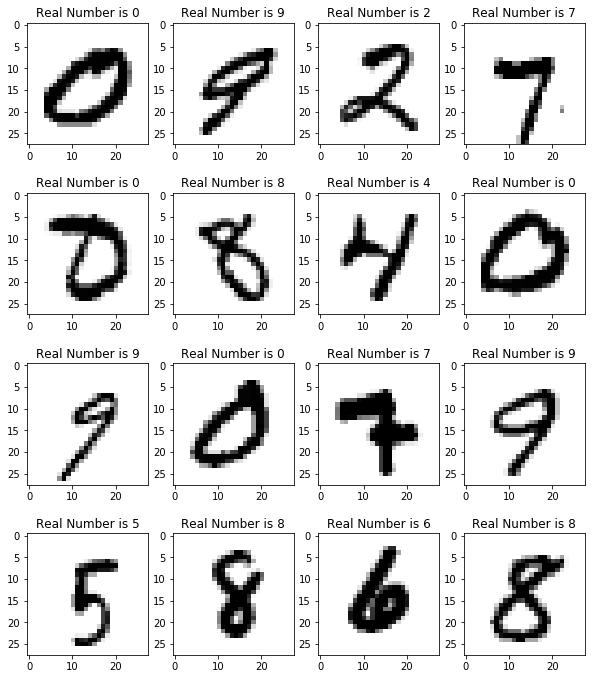

In [0]:
import matplotlib.pyplot as plt

X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(10, 12))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_train[i]}");

###One-Hot Encoding



In [0]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y = to_categorical(y)

y_train.shape, y_test.shape



((39900, 10), (2100, 10))

### Data Augmentation


In [0]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)


###Normalization

In [0]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

### Model Definition



In [0]:

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
import time

NAME = "MNIST-CNN-{}".format(int(time.time()))


def model():
    tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

    model=Sequential()
    model.add(Lambda(standardize,input_shape=(28,28,1)))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(Conv2D(128,(3,3),activation="relu"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3),activation="relu"))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    #model.fit_generator(generator=batches,steps_per_epoch=batches.n,epochs=1)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,callbacks=[tensorboard])
    return model

In [0]:
#model.summary()
model = model()


Train on 39900 samples, validate on 2100 samples
Epoch 1/5
39900/39900 [==============================] - 12s 296us/step - loss: 0.1078 - acc: 0.9674 - val_loss: 0.0501 - val_acc: 0.9852
Epoch 2/5
39900/39900 [==============================] - 11s 283us/step - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0482 - val_acc: 0.9833
Epoch 3/5
39900/39900 [==============================] - 11s 283us/step - loss: 0.0428 - acc: 0.9876 - val_loss: 0.0470 - val_acc: 0.9881
Epoch 4/5
39900/39900 [==============================] - 11s 281us/step - loss: 0.0357 - acc: 0.9896 - val_loss: 0.0230 - val_acc: 0.9910
Epoch 5/5
39900/39900 [==============================] - 11s 281us/step - loss: 0.0285 - acc: 0.9913 - val_loss: 0.0407 - val_acc: 0.9867


## Adapt this data in order to use FastAI

In [0]:
#X_for_images = train.drop(['label'],axis=1).values 
#test_x_for_images=test.values
#y = train['label'].values 

XX = X_for_images.reshape(X.shape[0],28,28)
xx = test_x_for_images.reshape(test_x_for_images.shape[0],28,28)



In [0]:
test=XX[0]

test = XX[0].astype(np.uint8)

In [0]:
xx.shape,XX.shape,len(y)

((28000, 28, 28), (42000, 28, 28), 42000)

In [0]:
from PIL import Image
im = Image.fromarray(test)
im.save("your_file.png")

### Creating path

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import os
os.getcwd()
#p = Path('/content/filesAudio')
path = Path(os.getcwd())

### Building the images and the panda (csv)





In [0]:
def np_to_png(array,filename):
  test = array.astype(np.uint8)
  im = Image.fromarray(test)
  im.save(filename)




In [0]:
path = Path(os.getcwd())
path

PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST')

In [0]:
data=[]
data__=[]
for i in range(len(y)):
  
  file='data/train/'+str(y[i])+'/'+str(i)+'.png'
  filename=pathfile
  np_to_png(XX[i],filename)
  path_to_list='/train/'+str(y[i])+'/'+str(i)+'.png'
  data.append([path_to_list,y[i]])
df = pd.DataFrame(data, columns=["name", "label"])

In [0]:
df = pd.DataFrame(data, columns=["name", "label"])


In [0]:
df.to_csv('data/labels.csv', encoding='utf-8',index=False)


In [0]:
pd.read_csv(path2/'labels.csv').head()


,name,label
0,/train/1/0.png,1
1,/train/0/1.png,0
2,/train/1/2.png,1
3,/train/4/3.png,4
4,/train/0/4.png,0


In [0]:
path.ls()

[PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/sample_submission.csv'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/train.csv'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/test.csv'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/digit-recognizer.zip'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/MNIST.ipynb'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/logs'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/data'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/labels.csv')]

In [0]:
for j in range(xx.shape[0]):
#for i in range(10):
  file='data/test/'+str(j)+'.png'
  filename=path/file
  np_to_png(xx[j],filename)
  
  

In [0]:
(path2).ls()


[PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/data/train'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/data/test'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/data/labels.csv')]

### Create DataBuch

In [0]:
path2=path/'data'
path2

PosixPath('/gdrive/My Drive/Colab Notebooks/Kaggle/MNIST/data')

In [0]:
#data = ImageDataBunch.from_csv(path2, size=28)
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_csv(path=path2, 
                               csv_labels='labels.csv', 
                               test='test',
                               size=28,
                              ds_tfms=tfms)

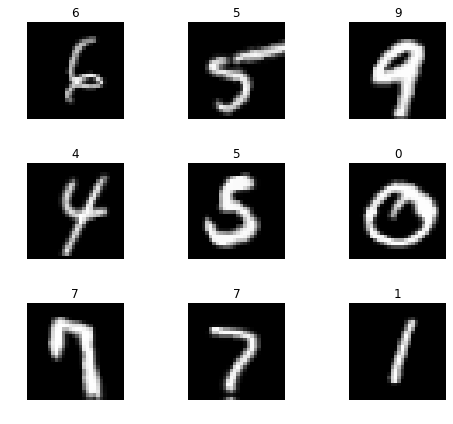

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(10, 10)

## Training: resnet34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

###learn.model


In [0]:
learn.fit_one_cycle(4)
# 4 is the number of times we show the dataset to the model.

epoch,train_loss,valid_loss,error_rate,time
0,0.643447,0.449308,0.142857,01:16
1,0.315786,0.215741,0.068214,01:15
2,0.209729,0.145310,0.045952,01:15
3,0.180734,0.136440,0.044286,01:15


After 4 epochs, model is a 95.6% accurate

In [0]:
learn.save('MNIST.stage-1')
# This is for saving the weights of the model.

## Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# learn knows what is my data and what is my model
# interp is a classification interpretation object

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

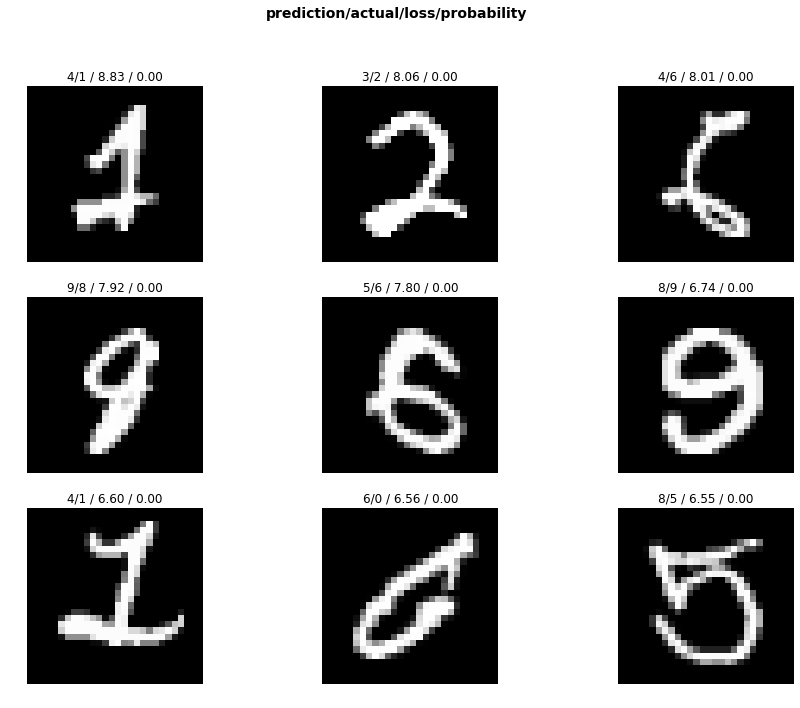

In [0]:
interp.plot_top_losses(9, figsize=(15,11))
# loss function tells us how good is my prediction
# a high loss means a big difference between prediction and reality
# we are printing the worst predictions.
# The tittle shows ( predictin / actual / loss / prob of actual class)

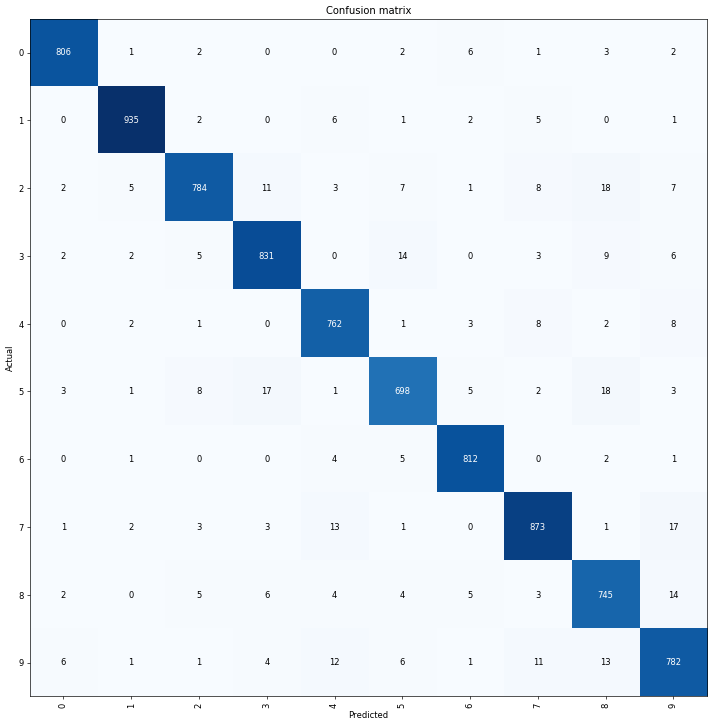

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
# List of many predictions Vs actuals.


In [0]:
interp.most_confused(min_val=2)
# Grabs from the confusion matrix, the tuple that gots more confused and the number of times
#that got confusing.

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()
# This is to release ( or unfreeze) the whole model so the model can be 
# entirely trained
'''
 The different layers represent differnt levels of semantic complexity. 
 The deeper you go in the layer, the more complex things you can identify.
 in example, in the layer 2 I may be able to differenciate cats from planes, 
 but in the layer 8 I may be able to differciate differnet breeds of cats / types of planes
 
'''


'\n The different layers represent differnt levels of semantic complexity. \n The deeper you go in the layer, the more complex things you can identify.\n in example, in the layer 2 I may be able to differenciate cats from planes, \n but in the layer 8 I may be able to differciate differnet breeds of cats / types of planes\n \n'

In [0]:
learn.load('MNIST.stage-4');

In [0]:
learn.fit_one_cycle(20)

Now the error is higher - after unfreeze - than before ( with just few layers)

In [0]:
learn.save('MNIST.stage-6')


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# learn knows what is my data and what is my model
# interp is a classification interpretation object

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

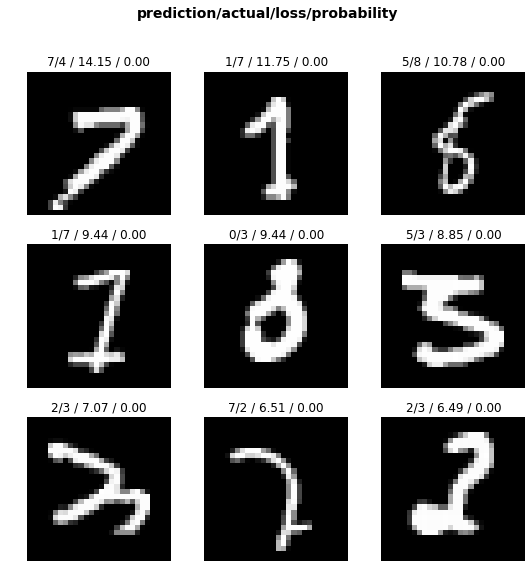

In [0]:
interp.plot_top_losses(9, figsize=(9,9))


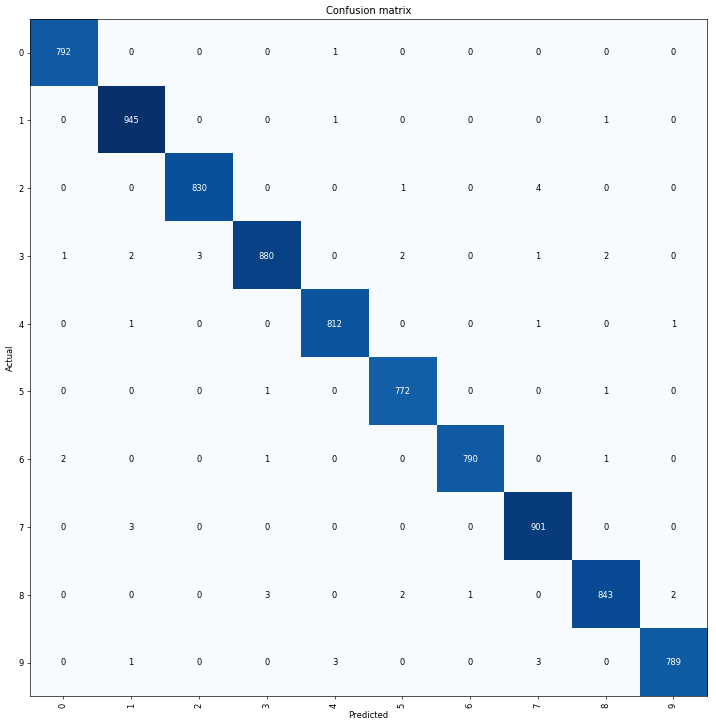

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [0]:
preds, y = learn.get_preds(DatasetType.Test)

## Submitting the file

In [0]:
y = torch.argmax(preds, dim=1)


In [0]:
imageid=np.arange(1,len(y)+1)

In [0]:
imageid

array([    1,     2,     3,     4, ..., 27997, 27998, 27999, 28000])

In [0]:
ds = pd.DataFrame(y)


In [0]:
ds['Image Id'] = imageid



In [0]:
ds.columns = ['Label', 'ImageId']
ds.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,0,4
4,3,5


In [0]:
cols=['ImageId','Label']
ds1=ds[cols]

In [0]:
ds1.head()
ds1.to_csv("submission.csv", index=False)